<a href="https://colab.research.google.com/github/ishita-jain01/Projects/blob/main/AI_based_Tic_Tac_Toe_Game_with_Search_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Missing values:
 Time      0
V1        1
V2        1
V3        1
V4        1
V5        1
V6        1
V7        1
V8        1
V9        1
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64


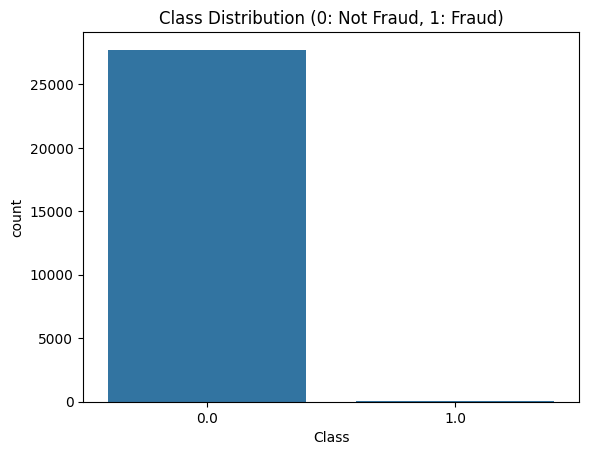


Confusion Matrix:
 [[19  2]
 [ 1 16]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      0.90      0.93        21
         1.0       0.89      0.94      0.91        17

    accuracy                           0.92        38
   macro avg       0.92      0.92      0.92        38
weighted avg       0.92      0.92      0.92        38



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset
data = pd.read_csv('creditcard.csv')

# Check for missing values
print("Missing values:\n", data.isnull().sum())

# Optional: Visualize class distribution
sns.countplot(x='Class', data=data)
plt.title('Class Distribution (0: Not Fraud, 1: Fraud)')
plt.show()

# Since data is highly imbalanced, let's balance it by undersampling
fraud = data[data['Class'] == 1]
non_fraud = data[data['Class'] == 0].sample(n=len(fraud))  # same number as fraud

balanced_data = pd.concat([fraud, non_fraud])
balanced_data = balanced_data.sample(frac=1, random_state=42)  # shuffle

# Features and labels
X = balanced_data.drop(['Class', 'Time'], axis=1)  # remove 'Time' as it's not useful
y = balanced_data['Class']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# SVM Model
svm_model = SVC(kernel='rbf', C=1, gamma='scale')  # RBF kernel usually performs well
svm_model.fit(X_train, y_train)

# Predictions
y_pred = svm_model.predict(X_test)

# Evaluation
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
